In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from bubbly.bubbly import bubbleplot
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)


In [ ]:
!pip install bubbly

In [ ]:
df=pd.read_excel("/content/Worksheet in Case Study question 2.xlsx")

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df.describe()


,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [ ]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [ ]:
# Calulating % of missing values


missing= df.isnull().sum() / len(df)
missing = missing(missing>0)
missing.sort_values(inplace=True)
missing=missing.to_frame()
missing.columns["Null_Counts"]
missing.index.names=["col_Name"]
missing=missing.reset_indext()
sns.set(style="Whitegrid",color_code=True)
sns.barplot(x='col_Name',y="Null_Counts", data=missing)
plt.xtriks(rotation=90)
plt.show()

TypeError: 'Series' object is not callable

In [ ]:
# Calculate the percentage of missing values
missing = df.isnull().sum() / len(df)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ["Null_Counts"]
missing.index.name = "col_Name"
missing = missing.reset_index()

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='col_Name', y='Null_Counts', data=missing)

plt.xticks(rotation=90)

plt.show()

In [ ]:
fruad_reported = df["fraud_reported"].value_counts()

In [ ]:
fruad_reported

In [ ]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
fruad=df["fraud_reported"].value_counts()
label_fruad=fruad.index
size_fruad=fruad.values

In [ ]:
label_fruad

In [ ]:
size_fruad

In [ ]:
data=df.copy()

In [ ]:
plt.bar(label_fruad,size_fruad,color='y')
plt.title("Distribution of Fruad Transaction ")
plt.show()

In [ ]:
plt.scatter(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'],color='b')
plt.title("Incedent_Hour")
plt.show()

In [ ]:


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.stripplot(x=df['property_damage'], y=df['property_claim'], palette='bone')
plt.title('Incident Type Vs Vehicle Claim')
plt.show()


In [ ]:


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 9)

sns.boxplot(x=df['incident_type'], y=df['vehicle_claim'], palette='pink')
plt.title("Incident Type Vs Vehicle Claim", fontsize=20)
plt.show()


In [ ]:


incedent = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))

incedent.div(incedent.sum(axis=1), axis=0).astype(float).plot(kind='bar', stacked=True, figsize=(15, 7), color=colors)

plt.title("Incident City Vs Incident Type", fontsize=20)
plt.legend()
plt.show()


In [ ]:

incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))

incident.div(incident.sum(axis=1), axis=0).astype(float).plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)
plt.title("Incident Type Vs Severity", fontsize=20)
plt.legend()
plt.show()

In [ ]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
incident.div(incident.sum(axis=1), axis=0).astype(float).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title("Incedent Vs Collision Type ", fontsize=10)
plt.legend()
plt.show()

In [ ]:
sns.countplot(df['insured_occupation'], palette='viridis')
plt.title("Different Type Of Occupation of Insured Customer ",fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.countplot(df['insured_hobbies'],palette = 'cool')
plt.title("Diffrent Type of Hobbies Of Insured Customers ", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.countplot(df['incident_type'])
plt.title("DIffrent Type of Incedent ",fontsize=15)
plt.show()

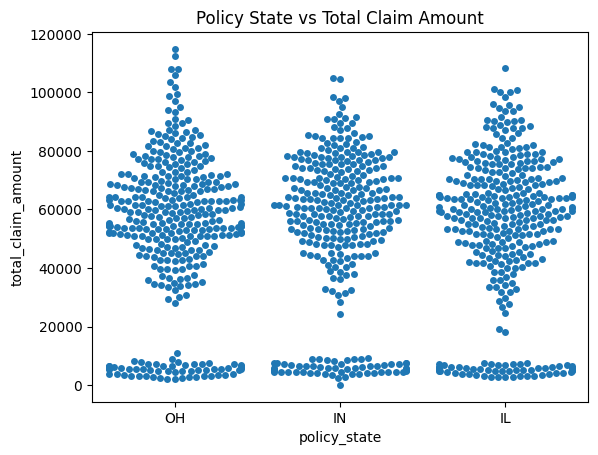

In [ ]:
sns.swarmplot(x=df['policy_state'],y=df['total_claim_amount'])
plt.title("Policy State vs Total Claim Amount")
plt.show()

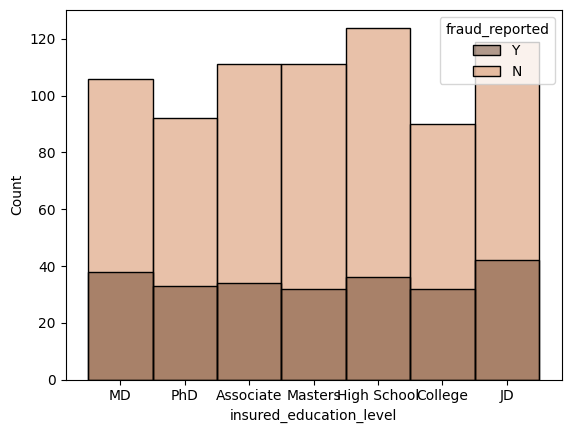

In [ ]:
sns.histplot(df,x='insured_education_level',palette='copper',hue='fraud_reported')
plt.show()

In [ ]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')


In [ ]:
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [ ]:
df['fraud_reported']=df['fraud_reported'].replace(("Y","N"),(0,1))

In [ ]:
df['fraud_reported']

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
!pip install category_encoders


In [ ]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()

df['auto_model'] = encoder.fit_transform(df['auto_model'], df['fraud_reported'])


In [ ]:
df['auto_model']

0      0.726288
1      0.744809
2      0.681579
3      0.676368
4      0.803741
         ...   
995    0.758386
996    0.732783
997    0.726500
998    0.678645
999    0.744809
Name: auto_model, Length: 1000, dtype: float64

In [ ]:
df['auto_model'].value_counts()

auto_model
0.726288    56
0.681579    43
0.868189    42
0.801500    40
0.733324    37
0.824733    37
0.773616    36
0.721348    35
0.732783    33
0.678645    32
0.822744    32
0.841506    31
0.860466    30
0.824856    28
0.794304    27
0.744809    27
0.670565    27
0.782256    25
0.757357    25
0.751204    24
0.726259    24
0.676368    24
0.819960    23
0.720057    23
0.663877    22
0.738854    22
0.688869    22
0.732676    21
0.776500    20
0.676500    20
0.726500    20
0.839182    18
0.689126    18
0.676550    16
0.720406    15
0.758386    13
0.803741    12
Name: count, dtype: int64

In [ ]:
df['auto_make']=encoder.fit_transform(df['auto_make'],df['fraud_reported'])

In [ ]:
df['auto_make']

0      0.774946
1      0.662543
2      0.750007
3      0.723792
4      0.808368
         ...   
995    0.745676
996    0.720853
997    0.762477
998    0.696076
999    0.662543
Name: auto_make, Length: 1000, dtype: float64

In [ ]:
df['police_report_available'] = encoder.fit_transform(df['police_report_available'], df['fraud_reported'])

In [ ]:
df['police_report_available']

0      0.770701
1      0.740525
2      0.749271
3      0.749271
4      0.749271
         ...   
995    0.740525
996    0.740525
997    0.770701
998    0.770701
999    0.740525
Name: police_report_available, Length: 1000, dtype: float64

In [ ]:
df['property_damage']=encoder.fit_transform(df['property_damage'],df['fraud_reported'])

In [ ]:
df['incident_city'] = encoder.fit_transform(df['incident_city'], df['fraud_reported'])

In [ ]:
df['incident_state'] = encoder.fit_transform(df['incident_state'], df['fraud_reported'])

In [ ]:
df['incident_state']

0      0.705645
1      0.772725
2      0.778626
3      0.645130
4      0.778626
         ...   
995    0.690917
996    0.705645
997    0.690917
998    0.778626
999    0.820276
Name: incident_state, Length: 1000, dtype: float64

In [ ]:
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'], df['fraud_reported'])

In [ ]:
df['incident_severity'] = encoder.fit_transform(df['incident_severity'], df['fraud_reported'])

In [ ]:
df['collision_type'] = encoder.fit_transform(df['collision_type'], df['fraud_reported'])

In [ ]:
df['incident_type'] = encoder.fit_transform(df['incident_type'], df['fraud_reported'])

In [ ]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [ ]:
df['insured_relationship'] = encoder.fit_transform(df['insured_relationship'], df['fraud_reported'])

In [ ]:
df['insured_hobbies'] = encoder.fit_transform(df['insured_hobbies'], df['fraud_reported'])

In [ ]:
df['insured_hobbies'] = encoder.fit_transform(df['insured_hobbies'], df['fraud_reported'])

In [ ]:
df['insured_occupation'] = encoder.fit_transform(df['insured_occupation'], df['fraud_reported'])

In [ ]:
df['insured_education_level'] = encoder.fit_transform(df['insured_education_level'], df['fraud_reported'])

In [ ]:
df['insured_sex'] = encoder.fit_transform(df['insured_sex'], df['fraud_reported'])

In [ ]:
df['policy_csl'] = encoder.fit_transform(df['policy_csl'], df['fraud_reported'])

In [ ]:
df['policy_state'] = encoder.fit_transform(df['policy_state'], df['fraud_reported'])

In [ ]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [ ]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,...,0.770701,71610,6510,13020,52080,0.774946,2004,0,1,25
1,228,42,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,...,0.740525,5070,780,780,3510,0.662543,2007,0,1,21
2,134,29,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,...,0.749271,34650,7700,3850,23100,0.750007,2007,1,2,22
3,256,41,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,...,0.749271,63400,6340,6340,50720,0.723792,2014,0,1,10
4,228,44,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,...,0.749271,6500,1300,650,4550,0.808368,2009,1,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.741477,0.783333,1000,1310.80,0,431289,0.765363,0.776224,...,0.740525,87200,17440,8720,61040,0.745676,2006,1,2,22
996,285,41,0.772189,0.742120,1000,1436.79,0,608177,0.765363,0.736000,...,0.740525,108480,18080,18080,72320,0.720853,2015,1,1,24
997,130,34,0.741477,0.737892,500,1383.49,3000000,442797,0.765363,0.776224,...,0.770701,67500,7500,7500,52500,0.762477,1996,1,1,23
998,458,62,0.772189,0.783333,2000,1356.92,5000000,441714,0.738661,0.765517,...,0.770701,46980,5220,5220,36540,0.696076,1998,1,2,26


In [ ]:
x3 = df.drop(['fraud_reported'], axis = 1)
y3 = df['fraud_reported']

print("Shape of x2 :", x3.shape)
print("Shape of y2 :", y3.shape)

Shape of x2 : (1000, 35)
Shape of y2 : (1000,)


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(x3,0.9)
xnew.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,incident_month,incident_day
0,328,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,0.702929,...,1,2,0.770701,71610,6510,13020,0.774946,2004,1,25
1,228,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,0.763434,...,0,0,0.740525,5070,780,780,0.662543,2007,1,21
2,134,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,0.723792,...,2,3,0.749271,34650,7700,3850,0.750007,2007,2,22
3,256,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,0.753619,...,1,2,0.749271,63400,6340,6340,0.723792,2014,1,10
4,228,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,0.723792,...,0,1,0.749271,6500,1300,650,0.808368,2009,2,17


In [ ]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xnew,y3, test_size = 0.25, random_state = 42)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (750, 32)
Shape of x_test : (250, 32)
Shape of y_train : (750,)
Shape of y_test : (250,)


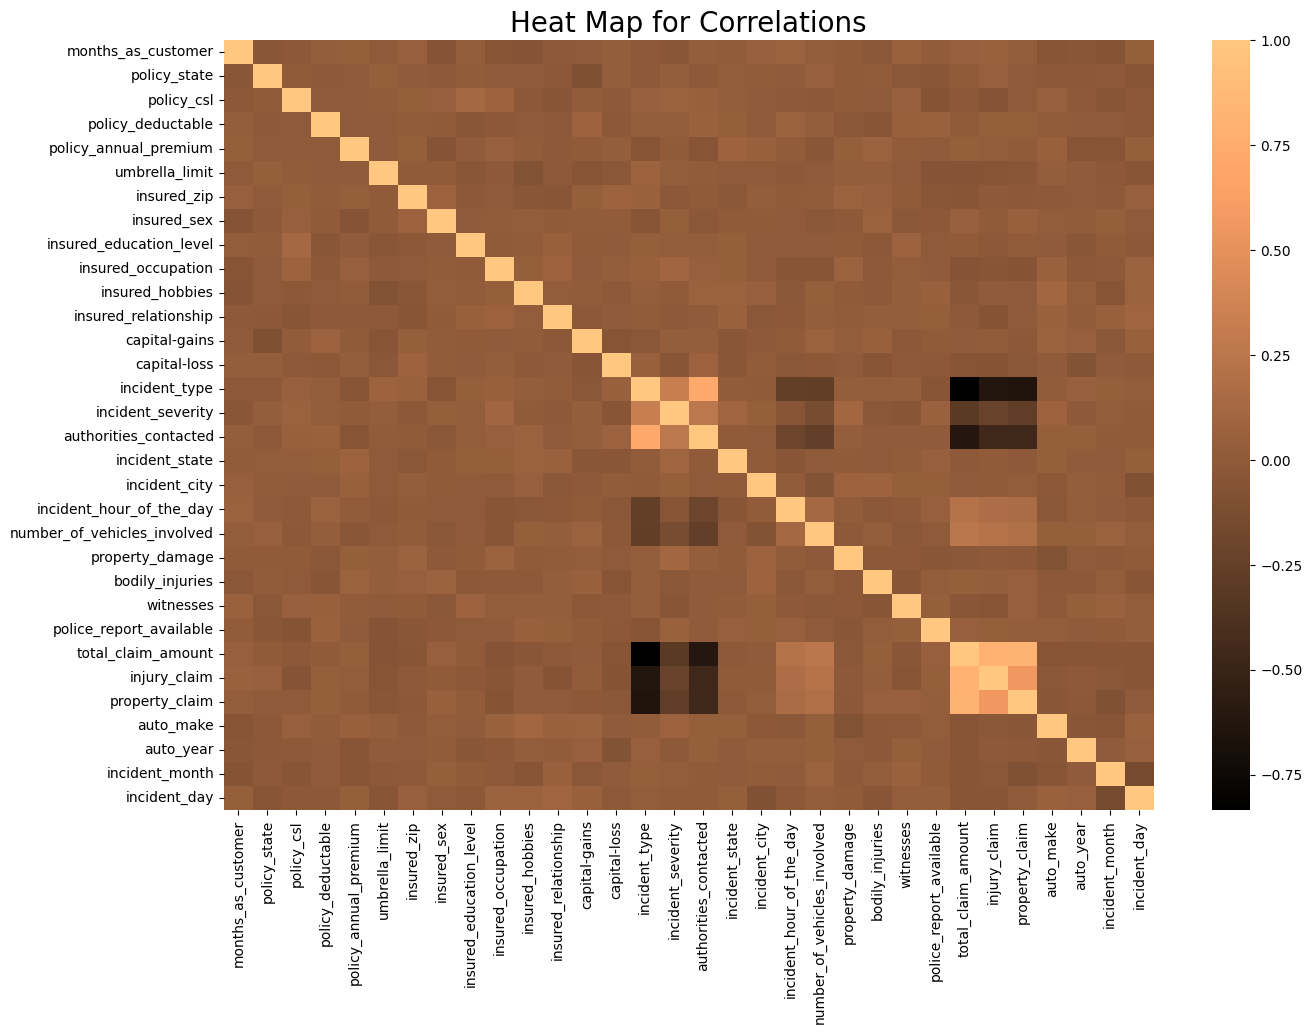

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model= RandomForestClassifier( oob_score = True, n_estimators= 100, n_jobs= -1, min_samples_split = 10, max_features='log2', max_depth = None)
model1= GradientBoostingClassifier(n_estimators= 100,min_samples_split = 10, max_features='log2', max_depth = None)

Training Accuracy:  0.98
Testing Accuarcy:  0.792
              precision    recall  f1-score   support

           0       0.65      0.48      0.55        67
           1       0.83      0.91      0.86       183

    accuracy                           0.79       250
   macro avg       0.74      0.69      0.71       250
weighted avg       0.78      0.79      0.78       250



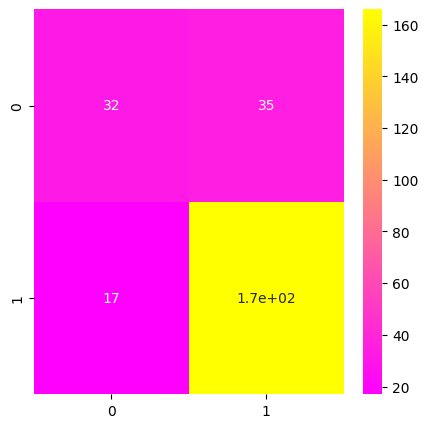

In [ ]:
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_rf)
print(cr)

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

<Axes: >

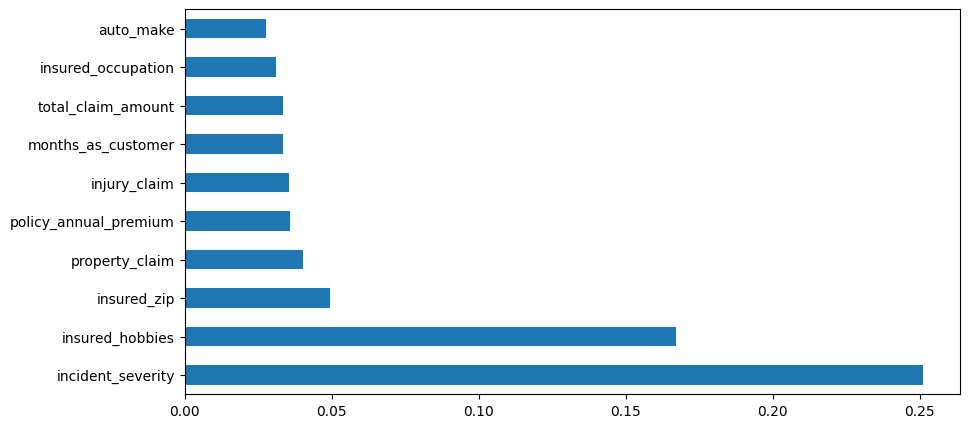

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(model.feature_importances_, index=xnew.columns)
feat_importances.nlargest(10).plot(kind='barh')

Training Accuracy:  1.0
Testing Accuarcy:  0.804
              precision    recall  f1-score   support

           0       0.66      0.57      0.61        67
           1       0.85      0.89      0.87       183

    accuracy                           0.80       250
   macro avg       0.75      0.73      0.74       250
weighted avg       0.80      0.80      0.80       250



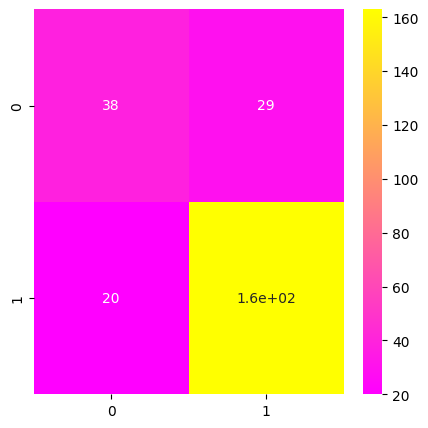

In [ ]:
model1.fit(x_train, y_train)
y_pred_rf1 = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

cr1 = classification_report(y_test,  y_pred_rf1)
print(cr1)

plt.rcParams['figure.figsize'] = (5, 5)
cm1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm1, annot = True, cmap = 'spring')
plt.show()

<Axes: >

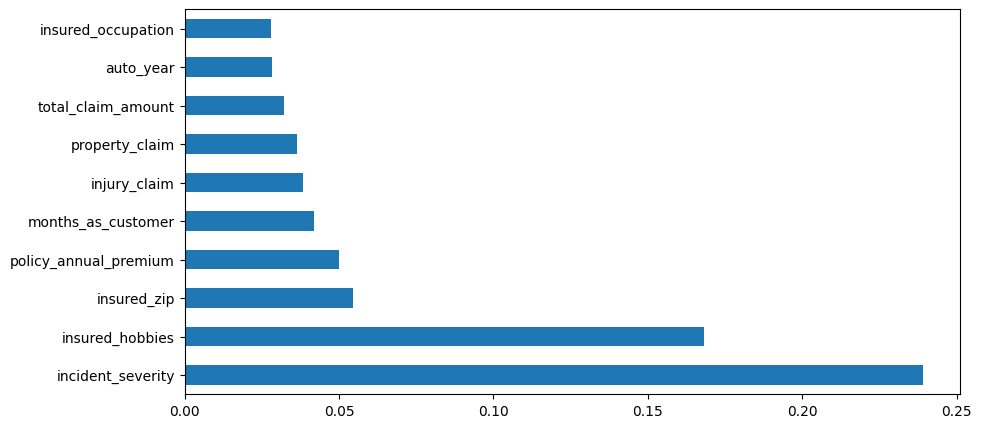

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(model1.feature_importances_, index=xnew.columns)
feat_importances.nlargest(10).plot(kind='barh')